170498071/170498071 [==============================] - 5s 0us/step
Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 1.5976 - accuracy: 0.4156 - val_loss: 1.3234 - val_accuracy: 0.5173
Epoch 2/10
782/782 [==============================] - 19s 24ms/step - loss: 1.2316 - accuracy: 0.5638 - val_loss: 1.2346 - val_accuracy: 0.5493
Epoch 3/10
782/782 [==============================] - 17s 22ms/step - loss: 1.0853 - accuracy: 0.6160 - val_loss: 1.1075 - val_accuracy: 0.6089
Epoch 4/10
782/782 [==============================] - 16s 20ms/step - loss: 0.9895 - accuracy: 0.6535 - val_loss: 1.0374 - val_accuracy: 0.6386
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 0.9157 - accuracy: 0.6792 - val_loss: 0.9398 - val_accuracy: 0.6658
Epoch 6/10
782/782 [==============================] - 16s 20ms/step - loss: 0.8599 - accuracy: 0.7002 - val_loss: 0.8984 - val_accuracy: 0.6860
Epoch 7/10
782/782 [==============================] - 16s 20ms/step -

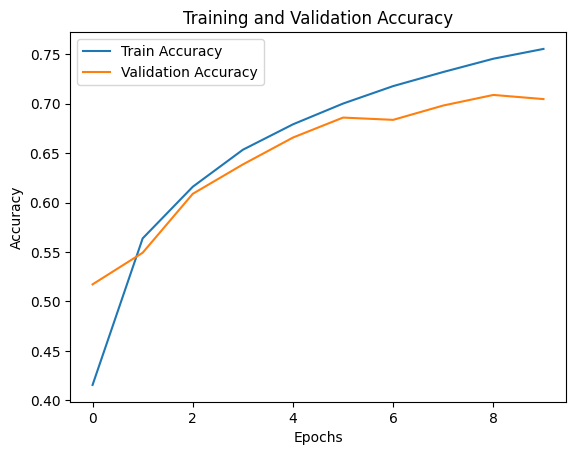

313/313 [==============================] - 1s 3ms/step


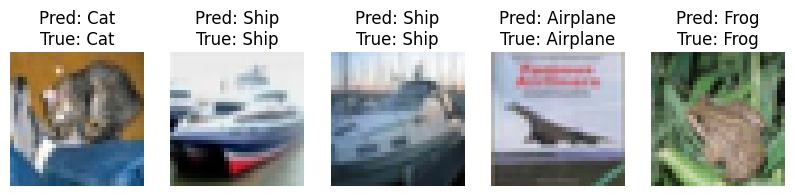

In [1]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 3: Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), batch_size=64)

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Step 6: Visualize training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Step 7: Display sample predictions
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 
               'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Display some predictions with their true labels
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[true_labels[i]]}")
    plt.axis('off')
plt.show()


model comparison

Hyperparameter Tuning
We will experiment with:

Different learning rates.
Optimizers (Adam, SGD).
Adding dropout layers to prevent overfitting.

In [3]:
from tensorflow.keras.optimizers import Adam, SGD

# Experiment 1: Model with a lower learning rate and dropout layers
model_tuned = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  # Added Dropout
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile with a lower learning rate
model_tuned.compile(optimizer=Adam(learning_rate=0.0005), 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])

# Train the tuned model
history_tuned = model_tuned.fit(x_train, y_train, epochs=10, 
                                validation_data=(x_test, y_test), 
                                batch_size=64)

# Evaluate tuned model
test_loss_tuned, test_acc_tuned = model_tuned.evaluate(x_test, y_test)
print(f"Test Accuracy (Tuned): {test_acc_tuned:.2f}")


Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 1.7003 - accuracy: 0.3737 - val_loss: 1.4232 - val_accuracy: 0.4829
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 1.3719 - accuracy: 0.5031 - val_loss: 1.3065 - val_accuracy: 0.5239
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 1.2482 - accuracy: 0.5557 - val_loss: 1.1339 - val_accuracy: 0.5994
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 1.1547 - accuracy: 0.5893 - val_loss: 1.0829 - val_accuracy: 0.6173
Epoch 5/10
782/782 [==============================] - 16s 20ms/step - loss: 1.0919 - accuracy: 0.6165 - val_loss: 1.0161 - val_accuracy: 0.6436
Epoch 6/10
782/782 [==============================] - 16s 20ms/step - loss: 1.0303 - accuracy: 0.6367 - val_loss: 0.9733 - val_accuracy: 0.6602
Epoch 7/10
782/782 [==============================] - 16s 20ms/step - loss: 0.9892 - accuracy: 0.6528 - val_loss: 0.9473 - val_accuracy:

2. Model Comparison
We will train and evaluate a pre-trained MobileNetV2 model and compare it to our custom CNN.

Using MobileNetV2 (Pre-trained Model)

In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input

# Load pre-trained MobileNetV2
input_layer = Input(shape=(32, 32, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=input_layer)

# Add custom classification head
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
output_layer = Dense(10, activation='softmax')(x)

model_mobilenet = Model(inputs=base_model.input, outputs=output_layer)

# Freeze base model layers for transfer learning
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=0.0005), 
                        loss='categorical_crossentropy', 
                        metrics=['accuracy'])

# Train MobileNetV2
history_mobilenet = model_mobilenet.fit(x_train, y_train, epochs=10, 
                                        validation_data=(x_test, y_test), 
                                        batch_size=64)

# Evaluate MobileNetV2
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(x_test, y_test)
print(f"Test Accuracy (MobileNetV2): {test_acc_mobilenet:.2f}")


Epoch 1/10
782/782 [==============================] - 20s 23ms/step - loss: 2.0358 - accuracy: 0.2726 - val_loss: 1.9249 - val_accuracy: 0.3045
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 1.8967 - accuracy: 0.3138 - val_loss: 1.8923 - val_accuracy: 0.3146
Epoch 3/10
782/782 [==============================] - 16s 21ms/step - loss: 1.8710 - accuracy: 0.3226 - val_loss: 1.8791 - val_accuracy: 0.3197
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 1.8549 - accuracy: 0.3276 - val_loss: 1.8663 - val_accuracy: 0.3272
Epoch 5/10
782/782 [==============================] - 17s 21ms/step - loss: 1.8421 - accuracy: 0.3330 - val_loss: 1.8570 - val_accuracy: 0.3324
Epoch 6/10
782/782 [==============================] - 16s 21ms/step - loss: 1.8304 - accuracy: 0.3363 - val_loss: 1.8512 - val_accuracy: 0.3302
Epoch 7/10
782/782 [==============================] - 16s 21ms/step - loss: 1.8199 - accuracy: 0.3392 - val_loss: 1.8440 - val_accuracy:

3. Visualizing and Comparing Results

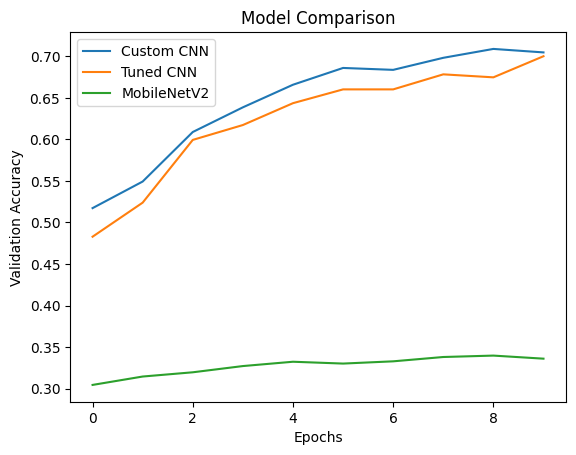

In [5]:
# Plot the accuracy of both models
plt.plot(history.history['val_accuracy'], label='Custom CNN')
plt.plot(history_tuned.history['val_accuracy'], label='Tuned CNN')
plt.plot(history_mobilenet.history['val_accuracy'], label='MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison')
plt.legend()
plt.show()
